# Lab03: Ensemble Methods using CancerData

* In this part of the practical, we will be using the Wisconsin Diagnostic breast cancer dataset, which is one of the datasets that we can load from Scikit-Learn <br>
* The dataset consists of 569 training samples and 30 features <br>
* The features are tumor attributes captured from medical images, and the target attribute to be predicted is whether the tumor is malignant or benign <br>
* We will learn to build an AdaBoost classifier and a gradient boosting classifier with this dataset

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Suppress warnings about too few trees from the early models
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# 1. Prepare Data

In [2]:
from sklearn.datasets import load_breast_cancer

bc = load_breast_cancer() 
bc.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

Most datasets available from Scikit-Learn have a `DESCR` property that gives a detailed description about the dataset

In [3]:
bc.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.  For inst

What are the other properties available?

In [4]:
bc.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

What are the features in this dataset?

In [5]:
bc.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
len(bc.feature_names)

30

What are the target labels?

In [7]:
bc.target_names

array(['malignant', 'benign'], dtype='<U9')

The data is stored with the `data` key

In [8]:
bc.data.shape

(569, 30)

The target column is stored with the `target` key

In [9]:
bc.target.shape

(569,)

We want to combine the data and target into a data frame, and name the target column as 'malignant'

In [10]:
data = np.c_[bc.data, bc.target]
column_names = np.append(bc.feature_names, ['malignant'])
data = pd.DataFrame(data, columns=column_names)

In [11]:
data.shape

(569, 31)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

Take note that the target labels are already numerically coded

In [13]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,malignant
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [14]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,malignant
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [15]:
data['malignant'].unique()
#there are only 0 and 1 in the malignant column

array([0., 1.])

In [16]:
data['malignant'].value_counts()
# data['malignant'].value_counts(normalize = True)

1.0    357
0.0    212
Name: malignant, dtype: int64

From the `DESCR` (Class Distribution: 212 - Malignant, 357 - Benign), we know that 'Malignant' is currently coded as 0.0, and 'Benign' as 1.0

We want to recode 'Malignant' to True (positive class) and 'Benign' to False

In [17]:
data['malignant'] = (data['malignant'] == 0.0).astype(bool)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [19]:
data['malignant'].value_counts()
data['malignant'].value_counts(normalize=True)

False    0.627417
True     0.372583
Name: malignant, dtype: float64

As both AdaBoost and gradient boosting are tree-based models, data scaling is not necessary

However, as the dataset is slightly skewed, we should use the stratified train/test split method

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit

feature_cols = [x for x in data.columns if x != 'malignant']

# Create the generator
strat_shuff_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Get the index values from the generator
train_idx, test_idx = next(strat_shuff_split.split(data[feature_cols], data['malignant']))

# Create the training and test sets
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'malignant']

X_test = data.loc[test_idx, feature_cols]
y_test = data.loc[test_idx, 'malignant']

In [21]:
y_train.value_counts()
y_train.value_counts(normalize=True)

False    0.626374
True     0.373626
Name: malignant, dtype: float64

In [22]:
y_test.value_counts()
y_test.value_counts(normalize=True)

False    0.631579
True     0.368421
Name: malignant, dtype: float64

In [23]:
# define a function to summarize errors for later call
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy': accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred)},
                      name=label)

# 2. AdaBoost classifier

Create an AdaBoost classifier and fit it using grid search <br> 
Try a range of number of estimators and learning rates <br>

NOTE: Setting `max_features=4` in the decision tree base estimators will increase the convergence rate

In [24]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1, max_features=4, random_state=42),
                             random_state=42)

param_grid = {'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400],
              'learning_rate': [0.3, 0.1, 0.01]}

gr_ada_clf = GridSearchCV(ada_clf,
                          param_grid=param_grid, 
                          scoring='accuracy',
                          n_jobs=-1)

gr_ada_clf = gr_ada_clf.fit(X_train, y_train)

The best model found by the grid search

In [25]:
gr_ada_clf.best_estimator_

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1, max_features=4,
                                                    random_state=42),
                   learning_rate=0.3, n_estimators=250, random_state=42)

In [26]:
gr_ada_clf.best_params_

{'learning_rate': 0.3, 'n_estimators': 250}

           train      test
accuracy     1.0  0.973684
precision    1.0  1.000000
recall       1.0  0.928571
f1           1.0  0.962963

              precision    recall  f1-score   support

       False       0.96      1.00      0.98        72
        True       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114




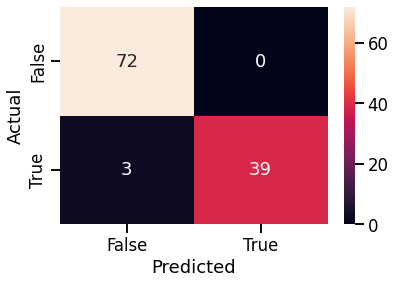

In [27]:
y_train_pred = gr_ada_clf.predict(X_train)
y_test_pred = gr_ada_clf.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                                   measure_error(y_test, y_test_pred, 'test')],
                                   axis=1)
print(train_test_full_error)
print()

print(classification_report(y_test, y_test_pred))
print()

cm = confusion_matrix(y_test, y_test_pred)

sns.set_context('talk')
ax = sns.heatmap(cm, annot=True, fmt='d')
labels = ['False', 'True']
ax.set_xticklabels(labels);
ax.set_yticklabels(labels);
ax.set_ylabel('Actual');
ax.set_xlabel('Predicted');

# 3. Gradient boosting classifier

Creare a gradient boosting classifier and fit it with grid search <br>
In grid search, we try to vary the two key hyperparameters, `n_estimators` and `learning_rate`

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 200, 300, 400], 'learning_rate': [0.1, 0.01]}

gr_gb_clf = GridSearchCV(GradientBoostingClassifier(max_features=4, random_state=42),
                      param_grid=param_grid,
                      scoring='accuracy',
                      n_jobs=-1)

gr_gb_clf = gr_gb_clf.fit(X_train, y_train)

In [29]:
gr_gb_clf.best_estimator_

GradientBoostingClassifier(max_features=4, random_state=42)

In [30]:
gr_gb_clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

           train      test
accuracy     1.0  0.973684
precision    1.0  1.000000
recall       1.0  0.928571
f1           1.0  0.962963

              precision    recall  f1-score   support

       False       0.96      1.00      0.98        72
        True       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114




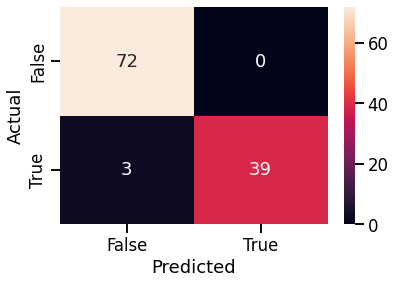

In [31]:
y_train_pred = gr_gb_clf.predict(X_train)
y_test_pred = gr_gb_clf.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                                   measure_error(y_test, y_test_pred, 'test')],
                                   axis=1)
print(train_test_full_error)
print()

print(classification_report(y_test, y_test_pred))
print()

cm = confusion_matrix(y_test, y_test_pred)

sns.set_context('talk')
ax = sns.heatmap(cm, annot=True, fmt='d')
labels = ['False', 'True']
ax.set_xticklabels(labels);
ax.set_yticklabels(labels);
ax.set_ylabel('Actual');
ax.set_xlabel('Predicted');